# Atividade 1

## Mauricio Noris Freire 
### TIA: 7185898-9



In [56]:
data = {
    
  'model'     :  None
, 'population':  None
, 'truthtable':  None
, 'fitness'   :  None
, 'mutation'  :  None   

}

params = {
     'N'         : 256 # numero de indivíduos
,    'Z'         : 1000 # numero de gerações
,    'p_fertil'  : 0.5 # individuos ferteis da geracao
,    'p_mut'     : 0.1 # prob mutação
,    'p_fitness' : 0.3 #prob fitness    
,    'shape'     : (28,28) # tamanho da figura
,    'index'     : 20 # id modelo
}

In [2]:
#Preparação

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

from numpy.linalg import norm

import tensorflow as tf
mnist = tf.keras.datasets.mnist


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def setPopulation():
    data['population'] = np.full((params['n_genes'], params['N'], params['Z']+1), np.inf)
    data['truthtable'] = np.full((params['n_genes'], params['N'], params['Z']+1), np.inf)
    data['fitness']    = np.full((params['n_genes'], params['N'], params['Z']), np.inf)
    data['mutation']   = np.full((params['n_genes'], params['N'], params['Z']), np.inf)
        

In [4]:
def setModel(): 
    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    
    data['model'] = np.array(x_train[params['index']], dtype='float').flatten()
    
    #data['model'] = np.array([0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1])
    #params['shape'] = (4,4)
    
    params['n_genes'] = data['model'].shape[0]
        

In [5]:
def showImage(input):
    plt.imshow(input.reshape(params['shape']), cmap='gray')
    plt.show()

In [54]:
def showImage2(gen):

    msg = "Geração: {} - Indivíduo: {} - Best Fitness: {}"

    ix = np.where(np.isin(data['fitness'][0,:,gen], max(data['fitness'][0,:,gen])))[0]
    print (msg.format(gen,ix[0],data['fitness'][0,ix[0],gen]))
    
    x1 = np.arange(params['N'])
    y1 = data['fitness'][0,:,gen]
   
    plt.plot(x1, y1, 'o-')
    plt.title('Fitness da geração:' + str(gen))
    plt.ylabel('%')
    plt.show()

    plt.imshow(data['population'][:,ix[0],gen].reshape(params['shape']), cmap='gray')
    plt.xlabel('Individuo')
    plt.show()

In [6]:
def initGeneration(gen):
    data['population'][:,:,gen] = np.random.choice([0,1],data['population'][:,:,gen].shape)

In [7]:
def calcFitness(ind,gen):
    data['truthtable'][:,ind,gen] = data['model'] == data['population'][:,ind,gen]
    data['fitness'][0,ind,gen] = np.sum(data['truthtable'][:,ind,gen],axis=0)/params['n_genes']
    

In [8]:
def selFerteis(gen):
    array = -np.array(data['fitness'][0,:,gen])
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    data['fitness'][1,:,gen] = ranks < params['p_fertil']*params['N']


In [9]:
def crossover(gen):

    ferteis = np.where(np.isin(data['fitness'][1,:,gen],[True]))
    
    temp = []
    temp2 = []
    temp3 = []
    
    for idf in ferteis[0]:
        temp.append(data['population'][:,idf ,gen]);
        temp2.append(np.where(np.isin(data['truthtable'][:,idf, gen],[False] ))[0]);
    
    for idx in range(0,len(temp),2):
        f1 = temp[idx]
        f2 = temp[idx+1]
        bdg_f1 = temp2[idx]
        bdg_f2 = temp2[idx+1]
        
        point = np.random.randint (params['n_genes'])
        #point = int(params['n_genes']/2)
        
        f3 = np.concatenate((f1[:point], f2[point:]))
        f4 = np.concatenate((f2[:point], f1[point:]))   

        new_f1 = f1
        for i in bdg_f1:
            new_f1[i] = np.random.choice([0,1])
            #new_f1[i] = f2[i]

        new_f2 = f2
        for i in bdg_f2:
            #new_f2[i] = np.random.choice([0,1])
            new_f2[i] = f1[i]  
        
        temp3.append(new_f1)
        temp3.append(new_f2)
        temp3.append(f3)
        temp3.append(f4)
        
    for idx in range(0,len(temp3)):
        novoIndividuo(temp3[idx], idx, gen+1)
    

In [10]:
def novoIndividuo(individuo, n, z):
    #print(individuo)
    data['population'][:, n, z] = mutation(individuo,n,z)
    

In [21]:
def mutation(individuo,n,z):
    if np.random.choice([0, 1], p=[1-params['p_mut'],params['p_mut']]):
        gM = np.random.randint(params['n_genes'])
        data['mutation'][gM,n,z] = True
        individuo[gM] = 1 - individuo[gM]
        
    return individuo
    

In [30]:
def evolution():
    
    for i in range(0, params['Z']-1):
        for j in range(0, params['N']):
            calcFitness(j,i)
        selFerteis(i)
        crossover(i)  

        if i % 100 == 0: 
            showImage2(i)

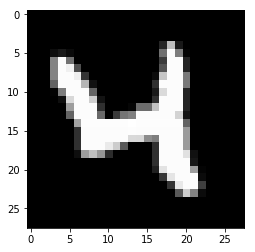

Geração: 0 - Indivíduo: 121 - Best Fitness: 0.42346938775510207


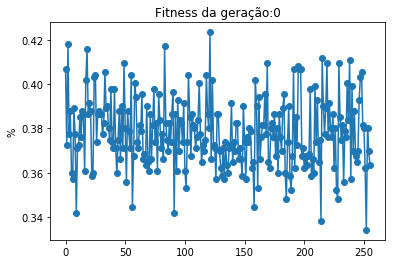

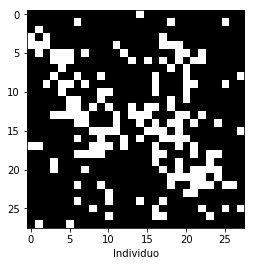

Geração: 100 - Indivíduo: 0 - Best Fitness: 0.7551020408163265


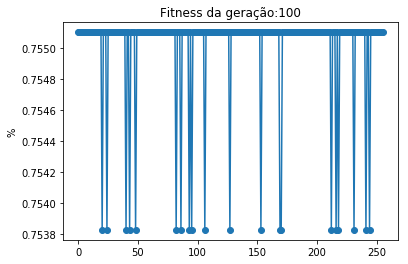

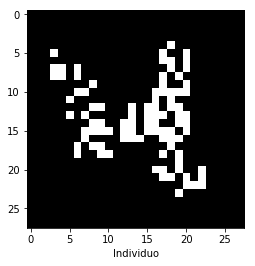

Geração: 200 - Indivíduo: 0 - Best Fitness: 0.7551020408163265


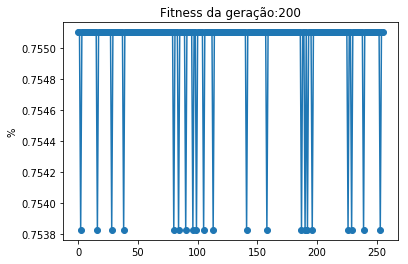

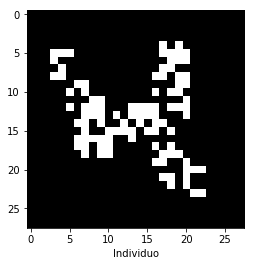

Geração: 300 - Indivíduo: 2 - Best Fitness: 0.7551020408163265


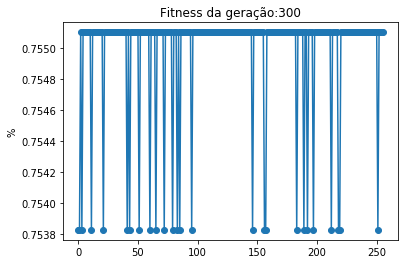

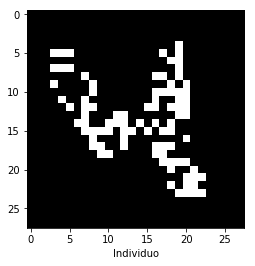

Geração: 400 - Indivíduo: 0 - Best Fitness: 0.7551020408163265


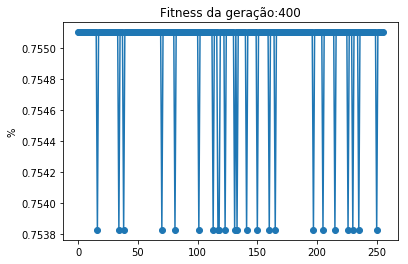

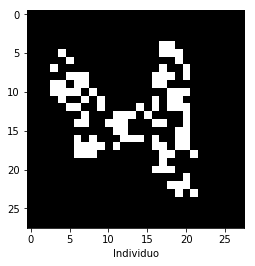

Geração: 500 - Indivíduo: 0 - Best Fitness: 0.7551020408163265


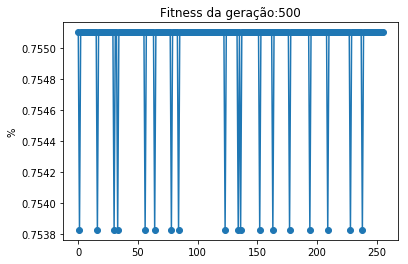

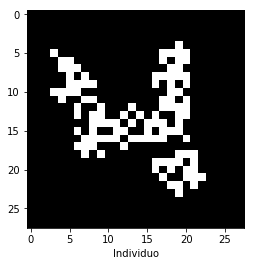

Geração: 600 - Indivíduo: 0 - Best Fitness: 0.7551020408163265


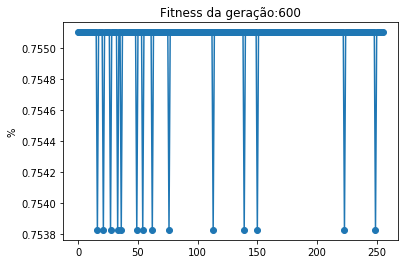

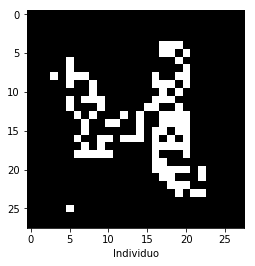

Geração: 700 - Indivíduo: 0 - Best Fitness: 0.7551020408163265


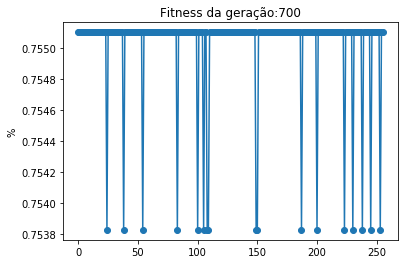

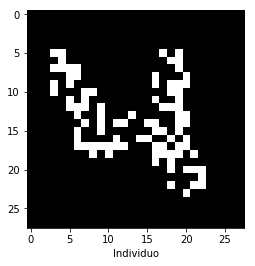

Geração: 800 - Indivíduo: 0 - Best Fitness: 0.7551020408163265


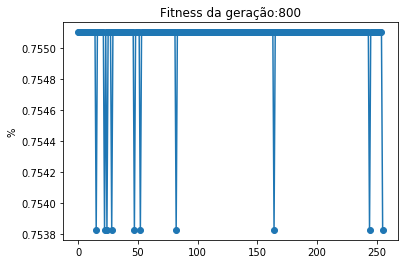

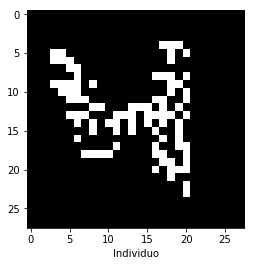

Geração: 900 - Indivíduo: 0 - Best Fitness: 0.7551020408163265


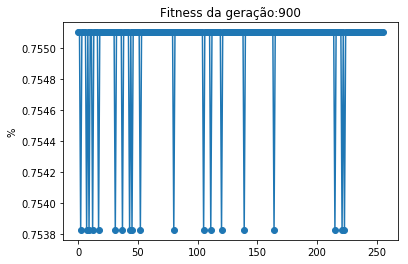

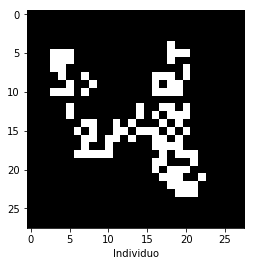

In [57]:

setModel();
showImage(data['model']) 
setPopulation();
initGeneration(0);
evolution()


In [14]:
#for i in range(0,params['N']):
#    calcFitness(i,gen)

In [15]:
#selFerteis(gen)

In [16]:
#crossover(gen)  

In [17]:
#print(data['fitness'][:,:,gen])
#for i in range(0,params['N']):
#    print(data['population'][:,i,gen])
